<a href="https://colab.research.google.com/github/Okkimaze/LE1_CARURUCAN_JM/blob/main/LE2_CARURUCAN_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble scaler = StandardScaler()
X = scaler.fit_transform(X)selection import RFE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, header=None, names=columns)


In [ ]:
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=columns)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
clf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=clf, n_features_to_select=5)
rfe.fit(X, y)
selected_features = rfe.support_
X_selected = X[:, selected_features]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_selected, X_test_selected, _, _ = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [ ]:
clf_all = RandomForestClassifier(random_state=42)
clf_all.fit(X_train, y_train)
y_pred_all = clf_all.predict(X_test)
y_pred_prob_all = clf_all.predict_proba(X_test)[:, 1]
accuracy_all = accuracy_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, y_pred_prob_all)
cm_all = confusion_matrix(y_test, y_pred_all)

clf_selected = RandomForestClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train)
y_pred_selected = clf_selected.predict(X_test_selected)
y_pred_prob_selected = clf_selected.predict_proba(X_test_selected)[:, 1]
accuracy_selected = accuracy_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_prob_selected)
cm_selected = confusion_matrix(y_test, y_pred_selected)
print("All Features - Accuracy:", accuracy_all)
print("All Features - ROC AUC:", roc_auc_all)
print("\nAll Features - Classification Report:\n", classification_report(y_test, y_pred_all))

print("Selected Features - Accuracy:", accuracy_selected)
print("Selected Features - ROC AUC:", roc_auc_selected)
print("\nSelected Features - Classification Report:\n", classification_report(y_test, y_pred_selected))

All Features - Accuracy: 0.8351648351648352
All Features - ROC AUC: 0.9125484496124031

All Features - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.83      0.81      0.82        43

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

Selected Features - Accuracy: 0.8571428571428571
Selected Features - ROC AUC: 0.9110949612403101

Selected Features - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        48
           1       0.84      0.86      0.85        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



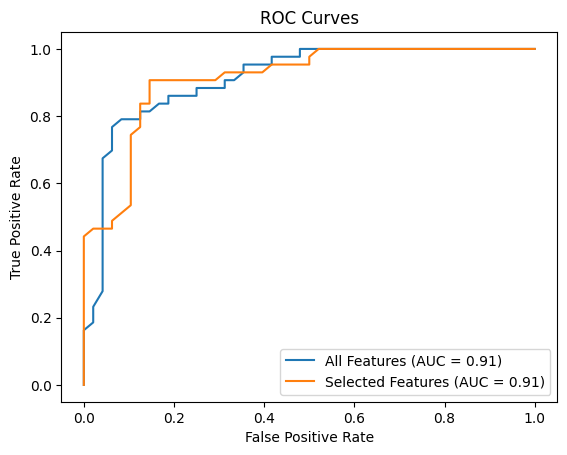

In [ ]:
fpr_all, tpr_all, _ = roc_curve(y_test, y_pred_prob_all)
fpr_selected, tpr_selected, _ = roc_curve(y_test, y_pred_prob_selected)

plt.figure()
plt.plot(fpr_all, tpr_all, label=f'All Features (AUC = {roc_auc_all:.2f})')
plt.plot(fpr_selected, tpr_selected, label=f'Selected Features (AUC = {roc_auc_selected:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

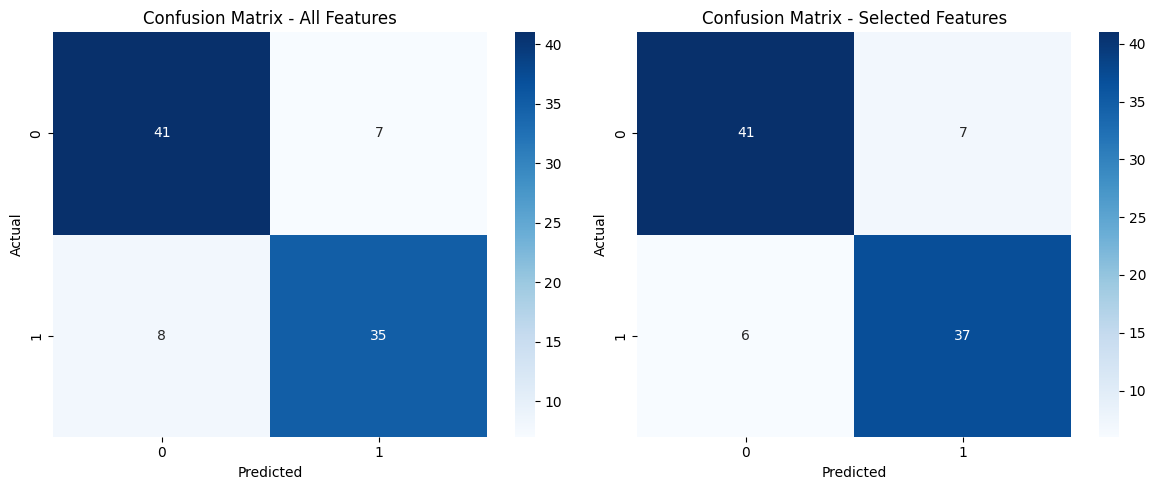

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Selected Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
results = pd.DataFrame({
    'Model': ['All Features', 'Selected Features'],
    'Accuracy': [accuracy_all, accuracy_selected],
    'ROC AUC': [roc_auc_all, roc_auc_selected]})

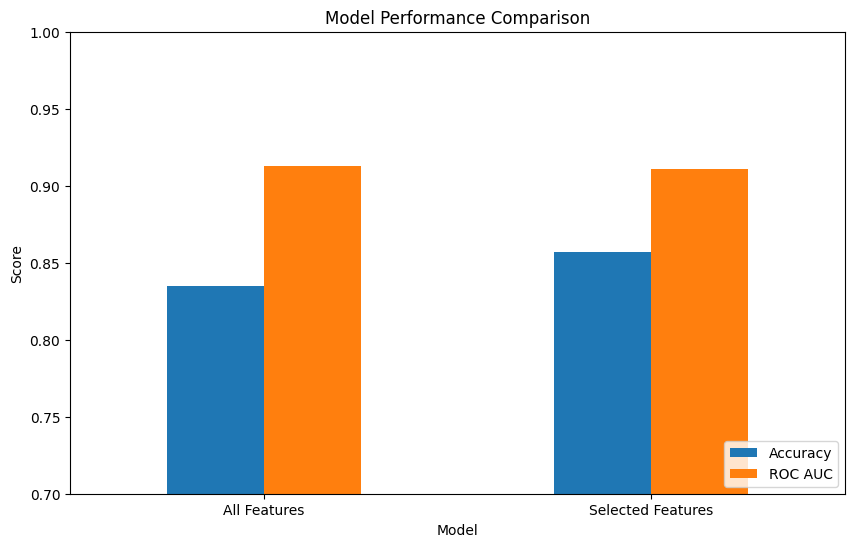

In [ ]:
results.set_index('Model', inplace=True)
results.plot(kind='bar', figsize=(10, 6), ylim=(0.7, 1.0))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()